In [1]:
!pip install wordcloud

In [2]:
# MSc Data Science Project: Data Ingestion, Preprocessing, Summary Statistics, and Visualizations
# Dataset: MovieLens (ratings.csv, movies.csv, tags.csv, links.csv)



#  Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# Setting global aesthetics for seaborn
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

In [4]:
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
tags= pd.read_csv('tags.csv')

In [5]:
# Inspect the Data

print("Ratings Sample:\n", ratings.head())
print("Movies Sample:\n", movies.head())
print("Tags Sample:\n", tags.head())
print("Links Sample:\n", links.head())

Ratings Sample:
    userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Movies Sample:
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Tags Sample:
    userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotabl

In [6]:
# Preprocess the Data

# Convert timestamps to datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Check for missing values
print("\nMissing Values Summary:")
print(ratings.isnull().sum())
print(movies.isnull().sum())
print(tags.isnull().sum())
print(links.isnull().sum())

# Remove duplicate tags
tags.drop_duplicates(inplace=True)

# Merge ratings with movies for enriched analysis
ratings_movies = pd.merge(ratings, movies, on='movieId')


Missing Values Summary:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [7]:
# Summary Statistics

# Basic rating distribution
print("\nRatings Summary:")
print(ratings['rating'].describe())

# Number of unique users and movies
print(f"\nNumber of unique users: {ratings['userId'].nunique()}")
print(f"Number of unique movies: {ratings['movieId'].nunique()}")

# Top 10 most rated movies
top_rated = ratings_movies['title'].value_counts().head(10)
print("\nTop 10 Most Rated Movies:\n", top_rated)


Ratings Summary:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Number of unique users: 610
Number of unique movies: 9724

Top 10 Most Rated Movies:
 title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


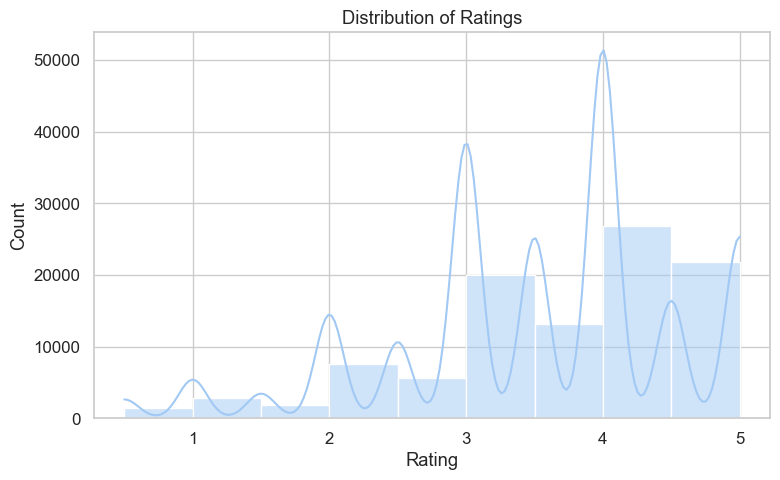

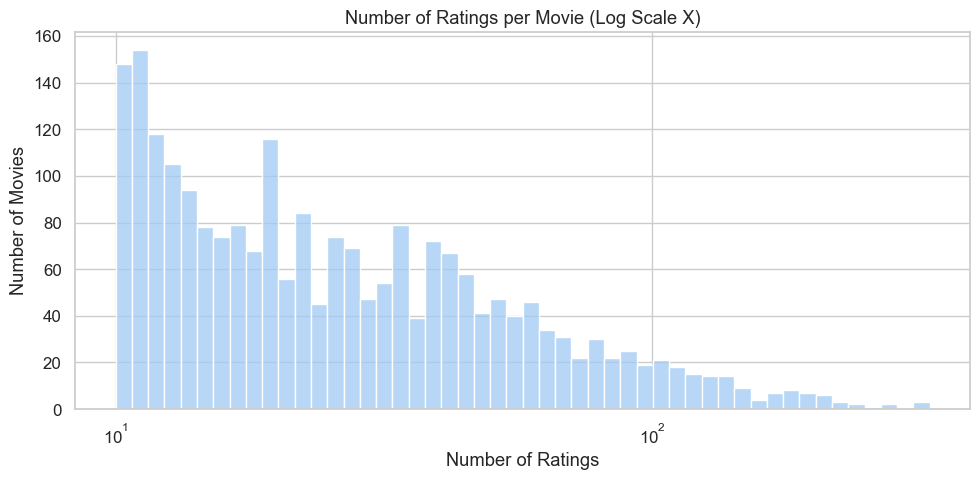

In [8]:
# STEP 6: Data Visualizations


# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=9, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Number of Ratings per Movie
ratings_per_movie = ratings['movieId'].value_counts()

# Filter movies with at least 10 ratings
filtered = ratings_per_movie[ratings_per_movie >= 10]

plt.figure(figsize=(10, 5))
sns.histplot(filtered, bins=50, log_scale=True)
plt.title('Number of Ratings per Movie (Log Scale X)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


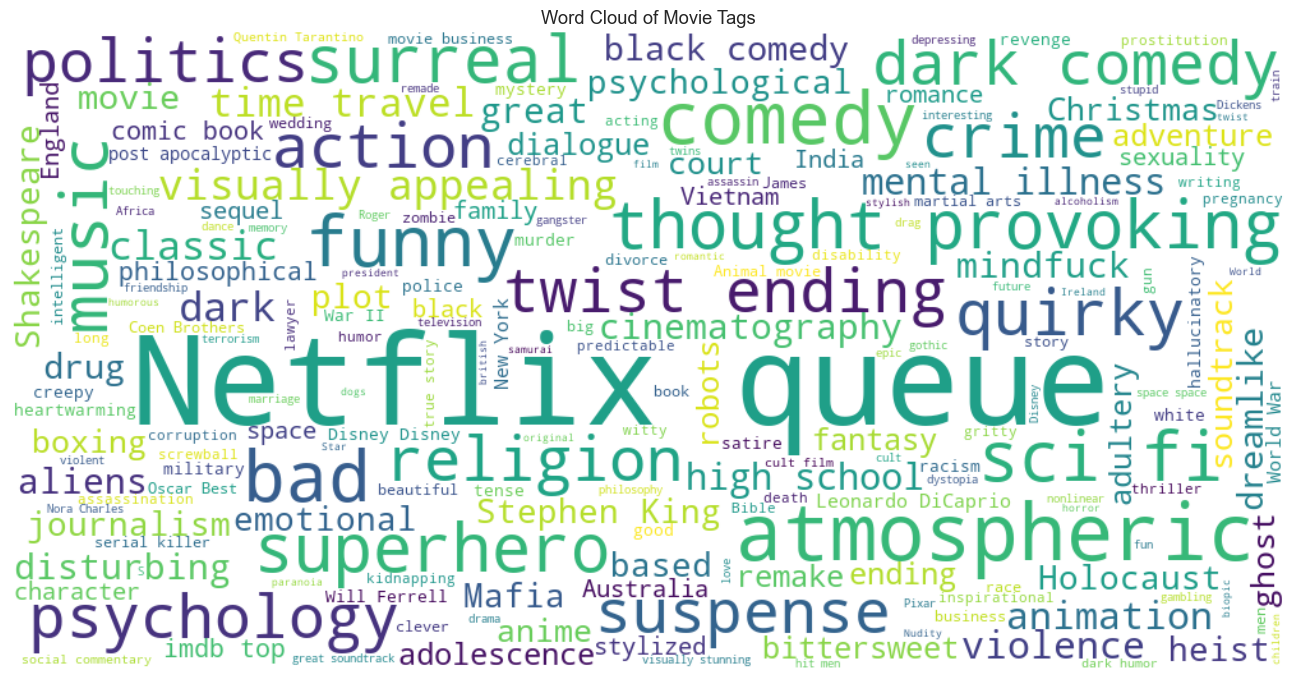

In [10]:
# 5. Word Cloud from Tags
text = ' '.join(tags['tag'].dropna().astype(str).values)
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Tags')
plt.tight_layout()
plt.show()